Pengumpulan Data dan Pra-pemrosesan

In [ ]:
# LINK DATASET ADA DIPALING BAWAH


# STEP 1: Import Library
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Visualisasi interaktif (opsional)
# %matplotlib inline

# =============================
# STEP 2: Load Dataset
# =============================
# Jika kamu sudah upload langsung ke Colab:
df = pd.read_csv('HRDataset_v14.csv')

# Tampilkan 5 baris pertama
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# =============================
# STEP 3: Eksplorasi Awal
# =============================
# Struktur dataset
df.info()

# Cek nilai kosong
print("\nMissing Values per Kolom:\n", df.isnull().sum())

# Statistik deskriptif
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311,303.000000,311,311,311.000000,311.000000,311.000000,311,311.000000,311.000000
unique,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,NaN,9,4,NaN,NaN,NaN,137,NaN,NaN
top,"Zima, Colleen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Michael Albert,NaN,Indeed,Fully Meets,NaN,NaN,NaN,1/14/2019,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,NaN,87,243,NaN,NaN,NaN,18,NaN,NaN
mean,NaN,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,...,NaN,14.570957,NaN,NaN,4.110000,3.890675,1.218650,NaN,0.414791,10.237942
std,NaN,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,...,NaN,8.078306,NaN,NaN,0.789938,0.909241,2.349421,NaN,1.294519,5.852596
min,NaN,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,...,NaN,1.000000,NaN,NaN,1.120000,1.000000,0.000000,NaN,0.000000,1.000000
25%,NaN,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,...,NaN,10.000000,NaN,NaN,3.690000,3.000000,0.000000,NaN,0.000000,5.000000
50%,NaN,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,...,NaN,15.000000,NaN,NaN,4.280000,4.000000,0.000000,NaN,0.000000,10.000000
75%,NaN,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,...,NaN,19.000000,NaN,NaN,4.700000,5.000000,0.000000,NaN,0.000000,15.000000


In [ ]:
# =============================
# STEP 4: Data Cleaning
# =============================

# Drop kolom identifier yang tidak dibutuhkan
df.drop(['Employee_Name', 'EmpID'], axis=1, inplace=True)

# Ubah format tanggal
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors='coerce')

# Drop baris dengan nilai kosong pada kolom penting
df = df.dropna(subset=['PerformanceScore', 'EngagementSurvey'])

# Isian nilai kosong lain dengan forward fill (atau bisa juga median)
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3-538767779.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# =============================
# STEP 5: Label Encoding (kolom kategorikal)
# =============================
# Encode semua kolom kategorikal
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# =============================
# STEP 6: Feature Engineering
# =============================

# Tambahkan kolom HighPerformer berdasarkan PerfScoreID
df['HighPerformer'] = (df['PerfScoreID'] >= 4).astype(int)

# Tambahkan kolom LateRisk (karyawan sering absen)
df['LateRisk'] = (df['Absences'] > 10).astype(int)

# Optional: Normalisasi kolom numerik jika diperlukan (nanti di tahap 2 modeling)

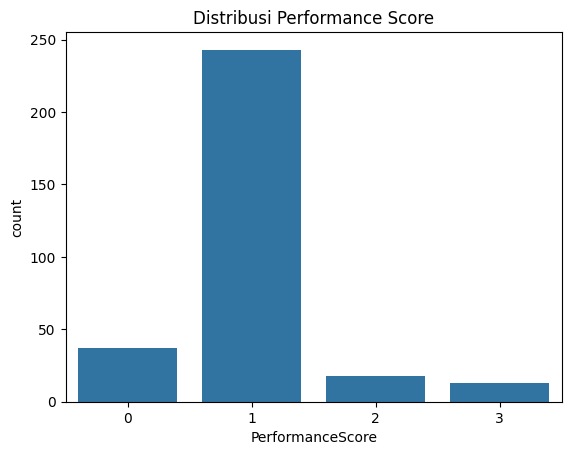

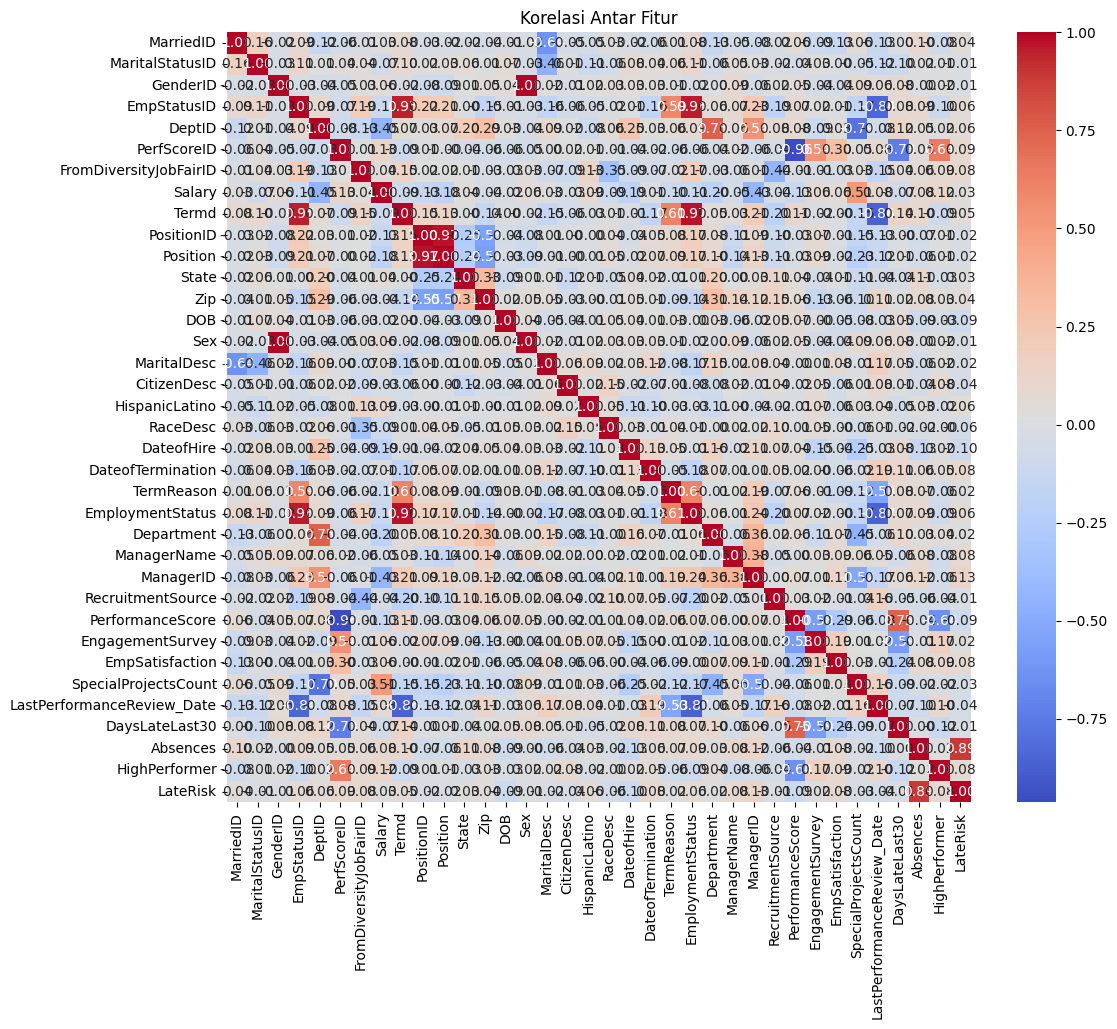

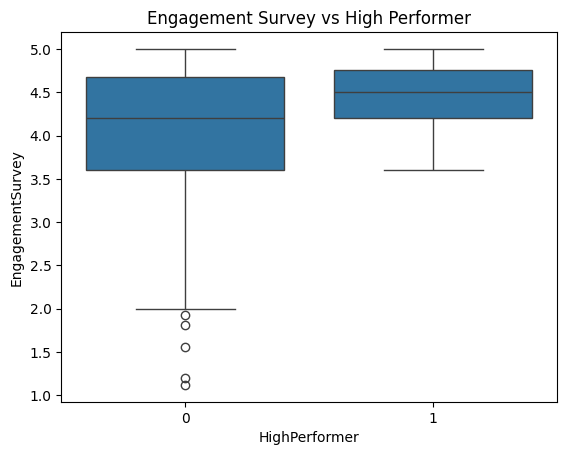

In [ ]:
# =============================
# STEP 7: Exploratory Data Analysis (EDA)
# =============================

# Plot distribusi Performance Score
sns.countplot(data=df, x='PerformanceScore')
plt.title("Distribusi Performance Score")
plt.show()

# Heatmap korelasi fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

# Hubungan Engagement Survey dan High Performer
sns.boxplot(data=df, x='HighPerformer', y='EngagementSurvey')
plt.title("Engagement Survey vs High Performer")
plt.show()

Pemodelan dan Pembelajaran Mesin

In [ ]:
HighPerformer (0 = Bukan Performer Tinggi, 1 = Performer Tinggi)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (ipython-input-8-3388122497.py, line 1)

HighPerformer (0 = Bukan Performer Tinggi, 1 = Performer Tinggi)

In [ ]:
from sklearn.model_selection import train_test_split

# Pastikan PerformanceScore juga tidak masuk ke dalam X
X = df.drop(['HighPerformer', 'PerformanceScore'], axis=1)
y = df['HighPerformer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran data training (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran data testing (X_test, y_test):", X_test.shape, y_test.shape)

Ukuran data training (X_train, y_train): (248, 34) (248,)
Ukuran data testing (X_test, y_test): (63, 34) (63,)


In [ ]:
# =============================
# STEP 1: Import Library Model
# =============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# =============================
# STEP 2: Inisialisasi & Training Model
# =============================

# Drop the date column before training
X_train_numeric = X_train.drop('LastPerformanceReview_Date', axis=1)
X_test_numeric = X_test.drop('LastPerformanceReview_Date', axis=1)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_numeric, y_train)
y_pred_rf = rf_model.predict(X_test_numeric)

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_numeric, y_train)
y_pred_lr = lr_model.predict(X_test_numeric)

# Model 3: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_numeric, y_train)
y_pred_dt = dt_model.predict(X_test_numeric)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Execute the cell to split the data
# This cell was previously added but not executed.
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('HighPerformer', axis=1)
y = df['HighPerformer']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data training (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran data testing (X_test, y_test):", X_test.shape, y_test.shape)

Ukuran data training (X_train, y_train): (248, 35) (248,)
Ukuran data testing (X_test, y_test): (63, 35) (63,)


In [ ]:
# =============================
# STEP 3: Evaluasi Semua Model
# =============================

def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)

=== Random Forest ===
Akurasi: 1.0
Confusion Matrix:
 [[58  0]
 [ 0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00         5

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

--------------------------------------------------
=== Logistic Regression ===
Akurasi: 0.8888888888888888
Confusion Matrix:
 [[55  3]
 [ 4  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.25      0.20      0.22         5

    accuracy                           0.89        63
   macro avg       0.59      0.57      0.58        63
weighted avg       0.88      0.89      0.88        63

--------------------------------------------------
=== Decision Tree ===
Akurasi

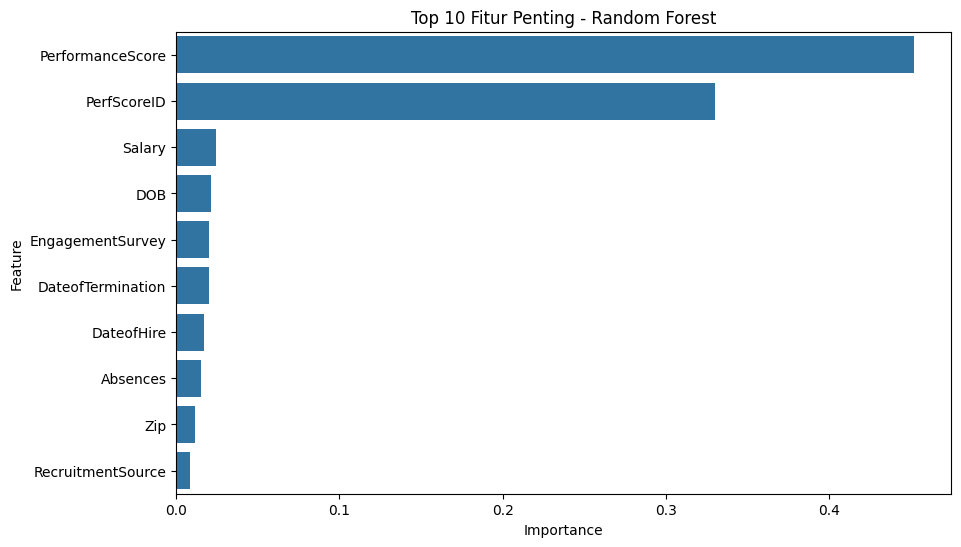

In [ ]:
# =============================
# STEP 4: Visualisasi Feature Importance (Random Forest)
# =============================
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Fitur Penting - Random Forest")
plt.show()

Validasi dan Evaluasi Model

In [ ]:
X = df.drop(['HighPerformer', 'PerformanceScore', 'PerfScoreID'], axis=1)

In [ ]:
# Cek kolom bertipe datetime
datetime_cols = X.select_dtypes(include=['datetime64']).columns
print("Kolom datetime yang akan di-drop:", datetime_cols)

# Drop kolom datetime sebelum training
X = X.drop(columns=datetime_cols)

Kolom datetime yang akan di-drop: Index(['LastPerformanceReview_Date'], dtype='object')


In [ ]:
# Split ulang setelah drop datetime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit model ulang
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
print("Akurasi per Fold (Cross Validation):", cv_scores)
print("Rata-rata Akurasi:", cv_scores.mean())

Akurasi per Fold (Cross Validation): [0.88       0.9        0.88       0.87755102 0.85714286]
Rata-rata Akurasi: 0.878938775510204


ROC AUC Score: 0.4961734693877551


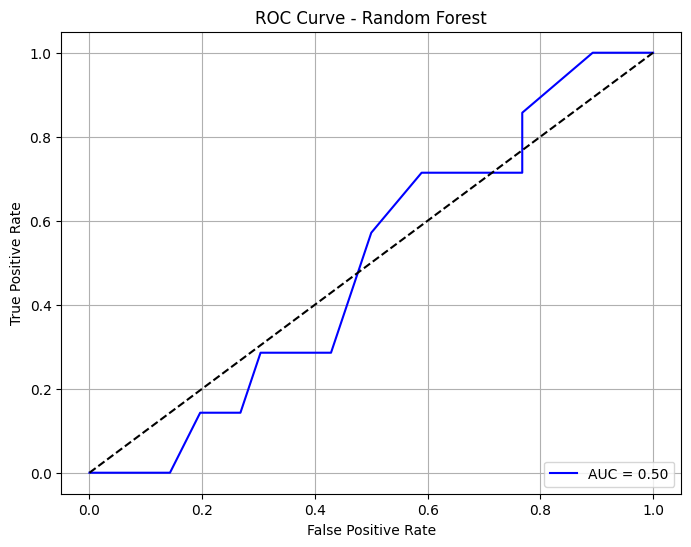

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi probabilitas kelas positif
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Hitung AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

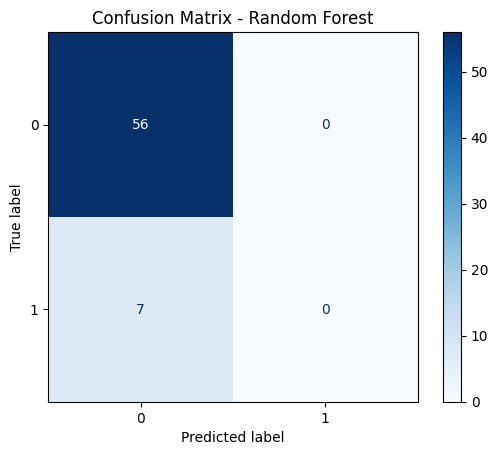

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       0.00      0.00      0.00         7

    accuracy                           0.89        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.79      0.89      0.84        63



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Penerapan

In [ ]:
# Simpan nama kolom fitur yang dipakai untuk training
joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(rf_model, 'model_rf.pkl')

['model_rf.pkl']

In [ ]:
# LINK DATASET DARI KAGGLE
# https://www.kaggle.com/datasets/rhuebner/human-resources-data-set